In [1]:
# 1. Importação de Bibliotecas e Preparação do Ambiente

import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import json
import string

# Download de recursos da NLTK (necessário apenas na primeira execução)
try:
    stopwords.words('english')
except LookupError:
    nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
# --- 1. Funções de Processamento ---

def process_json_to_corpus(data, top_level_key):
    """
    Processa o JSON carregado.
    'top_level_key' pode ser "races" ou "classes".
    Retorna um 'corpus' (lista de "documentões") e os 'labels'.
    """
    corpus = []
    doc_labels = []

    if top_level_key not in data:
        print(f"Erro: Chave '{top_level_key}' não encontrada no JSON.")
        return corpus, doc_labels

    for label, snippets in data[top_level_key].items():
        snippets_sem_pontuacao = [
            s.translate(str.maketrans("", "", string.punctuation))
            for s in snippets
        ]
        full_document = " ".join([s for s in snippets_sem_pontuacao if s.strip()])

        if full_document:
            corpus.append(full_document)
            doc_labels.append(label.capitalize())
        else:
            print(f"Aviso: Documento '{label}' estava vazio.")

    return corpus, doc_labels

def stem_tokenizer(text):
    global stemmer
    tokens = text.split()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return stemmed_tokens

# --- 2. Carregar e Preparar os Dados ---

filepath = r'/content/json_unificado.json'
dados_unificados = {}

try:
    with open(filepath, 'r') as f:
        dados_unificados = json.load(f)
except FileNotFoundError:
    print(f"ERRO: Arquivo não encontrado: {filepath}")
    # Se o arquivo não for encontrado, paramos o script
    exit()
except json.JSONDecodeError:
    print(f"ERRO: O arquivo '{filepath}' não é um JSON válido.")
    exit()

In [3]:
# Queremos "Raça vs Raça", então usamos a chave "races"
print("Processando 'races' do arquivo JSON...")
corpus, doc_labels = process_json_to_corpus(dados_unificados, "races")

# Se você quisesse "Classe vs Classe", era só mudar "races" para "classes":
# print("Processando 'classes' do arquivo JSON...")
# corpus, doc_labels = process_json_to_corpus(dados_unificados, "classes")

# --- Configurações de NLP (fazemos uma vez) ---
stemmer = PorterStemmer()
english_stop_words_original = set(stopwords.words('english'))
english_stop_words_original.update(string.punctuation)
stop_words_stemmed = [stemmer.stem(word) for word in english_stop_words_original]

# --- 3. Processamento (TF-IDF) ---

print("\n--- Processando RAÇAS ---")
corpus_races, labels_races = process_json_to_corpus(dados_unificados, "races")

if not corpus_races:
    print("Corpus de Raças está vazio! Verifique a chave 'races' no JSON.")
else:
    print(f"Corpus de Raças criado com {len(corpus_races)} documentos.")

    # (Vetorização TF-IDF para Raças)
    tfidf_vec_races = TfidfVectorizer(
        lowercase=True,
        stop_words=stop_words_stemmed,
        tokenizer=stem_tokenizer
    )
    X_tfidf_races = tfidf_vec_races.fit_transform(corpus_races)

Processando 'races' do arquivo JSON...

--- Processando RAÇAS ---
Corpus de Raças criado com 9 documentos.


/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['becau'] not in stop_words.
  warnings.warn(


Gerando Heatmap de Raças...


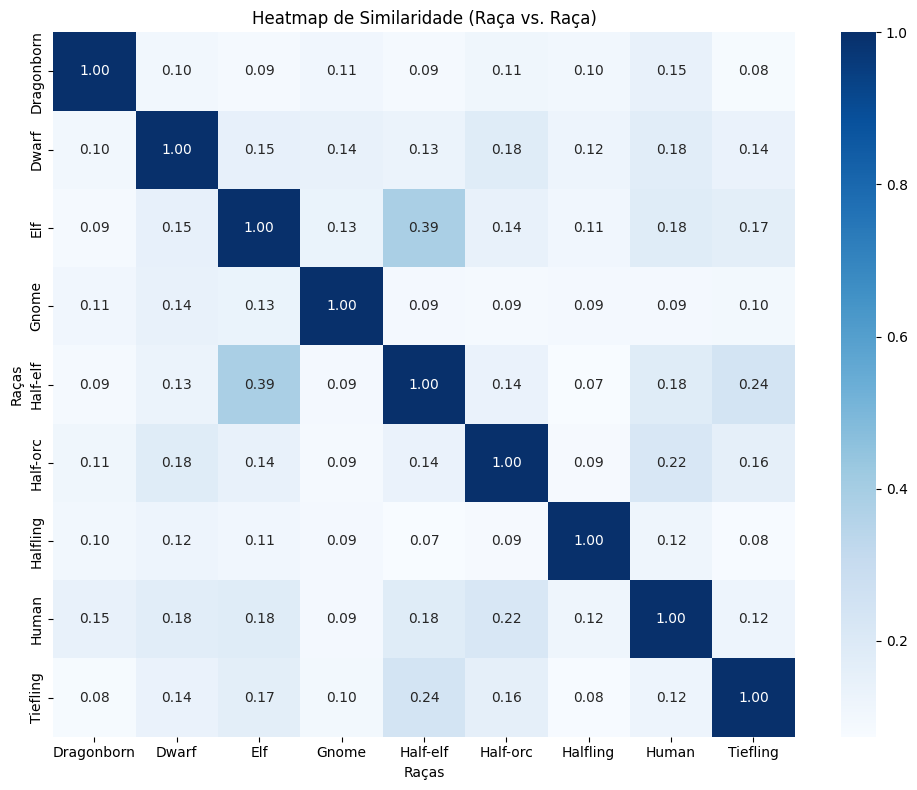

In [4]:
# (Matriz de Similaridade para Raças)
sim_matrix_races = cosine_similarity(X_tfidf_races, X_tfidf_races)
df_sim_races = pd.DataFrame(sim_matrix_races, index=labels_races, columns=labels_races)

    # (Plotar Heatmap de Raças)
print("Gerando Heatmap de Raças...")
plt.figure(figsize=(10, 8))
sns.heatmap(
    df_sim_races,
    annot=True,
    cmap="Blues",
    fmt=".2f"
)
plt.title("Heatmap de Similaridade (Raça vs. Raça)")
plt.xlabel("Raças")
plt.ylabel("Raças")
plt.tight_layout()
plt.show()

In [5]:
print("\n--- Processando CLASSES ---")
corpus_classes, labels_classes = process_json_to_corpus(dados_unificados, "classes")

if not corpus_classes:
    print("Corpus de Classes está vazio! Verifique a chave 'classes' no JSON.")
else:
    print(f"Corpus de Classes criado com {len(corpus_classes)} documentos.")

    # (Vetorização TF-IDF para Classes)
    tfidf_vec_classes = TfidfVectorizer(
        lowercase=True,
        stop_words=stop_words_stemmed,
        tokenizer=stem_tokenizer
    )
    X_tfidf_classes = tfidf_vec_classes.fit_transform(corpus_classes)


--- Processando CLASSES ---
Corpus de Classes criado com 13 documentos.


/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['becau'] not in stop_words.
  warnings.warn(


Gerando Heatmap de Classes...


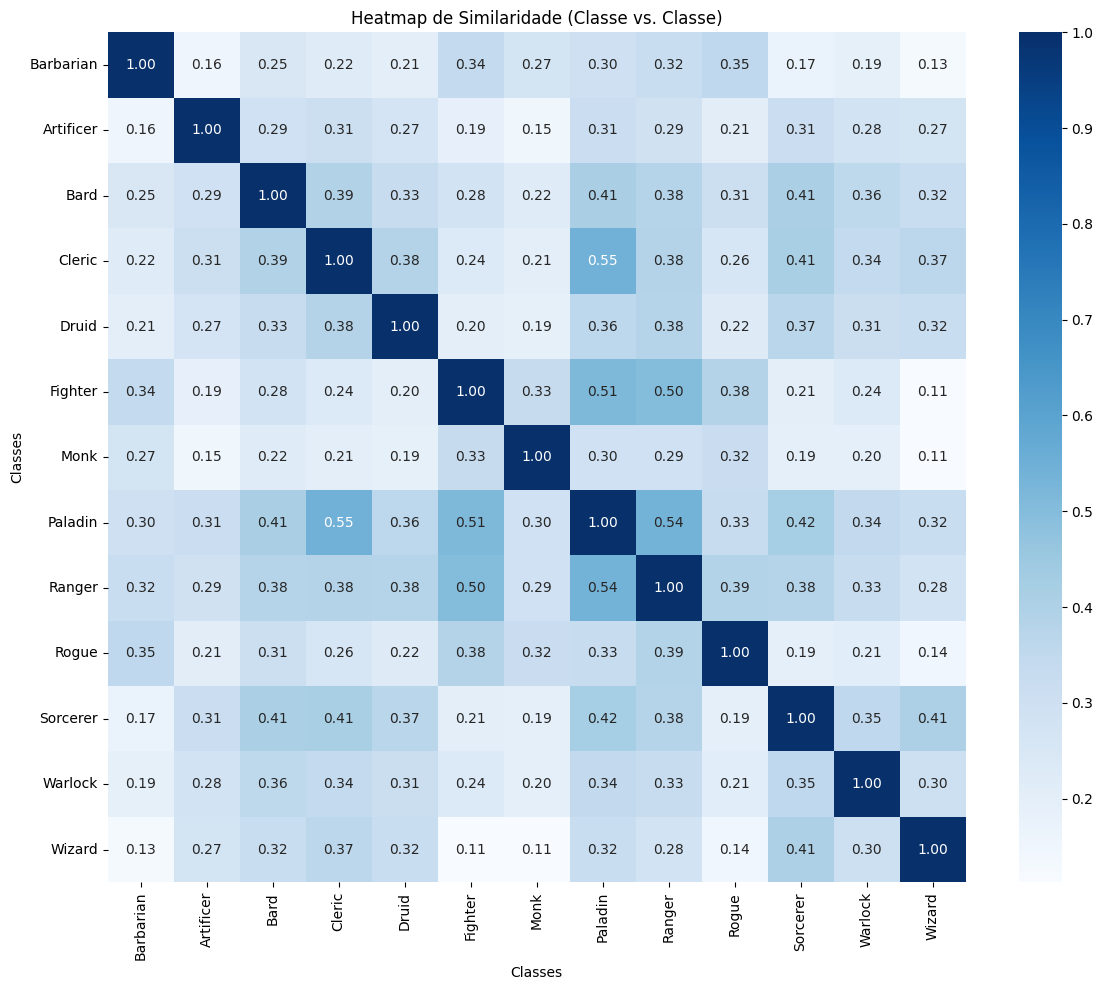


--- Processamento Concluído ---


In [6]:
# (Matriz de Similaridade para Classes)
sim_matrix_classes = cosine_similarity(X_tfidf_classes, X_tfidf_classes)
df_sim_classes = pd.DataFrame(sim_matrix_classes, index=labels_classes, columns=labels_classes)

    # (Plotar Heatmap de Classes)
print("Gerando Heatmap de Classes...")
plt.figure(figsize=(12, 10)) # Maior, pois são mais classes
sns.heatmap(
    df_sim_classes,
    annot=True,
    cmap="Blues",
    fmt=".2f"
)
plt.title("Heatmap de Similaridade (Classe vs. Classe)")
plt.xlabel("Classes")
plt.ylabel("Classes")
plt.tight_layout()
plt.show()

print("\n--- Processamento Concluído ---")